In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env
import acquire

## Acquire (acquire.py)

Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = acquire.new_zillow_data()

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


## 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
give_me = acquire.get_data_summary(df)
give_me

The zillow dataframe has 77381 rows and 68 columns.

-------------------
There are total of 2555514 missing values in the entire dataframe.

-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77381 non-null  int64  
 1   parcelid                      77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid       

## 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

In [5]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

In [6]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,67.753066
architecturalstyletypeid,77175,99.733785
basementsqft,77331,99.935385
...,...,...
buildingclassdesc,77366,99.980615
heatingorsystemdesc,27941,36.108347
propertylandusedesc,0,0.000000
storydesc,77331,99.935385


#### Takeaways:
- varied number of null values
- drop columns that have more than 50% missing values

## 3.1. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [20]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index().set_index('num_cols_missing')
    return rows_missing

In [21]:
nulls_by_row(df)

,percent_cols_missing,num_rows
num_cols_missing,,
23,33.82352941176471,2
24,35.294117647058826,13
25,36.76470588235294,24
26,38.23529411764706,65
27,39.705882352941174,316
28,41.17647058823529,455
29,42.64705882352941,5270
30,44.11764705882353,3455
31,45.588235294117645,9891


#### Takeaways:
- 5775 rows that are missing 36 columns
- drop rows that have more than 75% missing values

In [9]:
#summarize data in the df
#head, info, describe, value counts, nulls

def summarize(df):
    '''
    this function will take in a single argument (a pandas df) 
    output to console various statistics on said dataframe, including:
    #.head()
    #.info()
    #.describe()
    #.value_counts()
    #observation of nulls in the dataframe
    '''
    #print head
    print('=================================================')
    print('Dataframe head: ')
    print(df.head(3))
    
    #print info
    print('=================================================')
    print('Dataframe info: ')
    print(df.info())
    
    #print descriptive stats
    print('=================================================')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] # not an object
    cat_cols = [col for col in df.columns if col not in num_cols]
    
    #print value counts
    print('=================================================')
    print('Dataframe value counts: ')
    for col in df. columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort = False))
    
    #print nulls by column
    print('=================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    
    #print nulls by row
    
    print('=================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=================================================')

## Prepare

## 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [10]:
summarize(df)

Dataframe head: 
        id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          3.5         4.0                  NaN   
1           NaN          1.0         2.0                  NaN   
2           NaN          2.0         3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1                    NaN                1.0  ...         6.111001e+13   
2                    NaN                2.0  ...         6.059022e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       2017-01-01                 None          

(1.9800000000000002, 3.9]      8
(3.9, 5.8]                     0
(5.8, 7.7]                   172
(7.7, 9.6]                    19
(9.6, 11.5]                    0
(11.5, 13.4]                   0
(13.4, 15.3]                   0
(15.3, 17.2]                   0
(17.2, 19.1]                   0
(19.1, 21.0]                   7
Name: architecturalstyletypeid, dtype: int64
(34.477000000000004, 390.2]    20
(390.2, 742.4]                 16
(742.4, 1094.6]                 7
(1094.6, 1446.8]                3
(1446.8, 1799.0]                0
(1799.0, 2151.2]                2
(2151.2, 2503.4]                0
(2503.4, 2855.6]                0
(2855.6, 3207.8]                1
(3207.8, 3560.0]                1
Name: basementsqft, dtype: int64
(-0.019, 1.8]    14909
(1.8, 3.6]       56436
(3.6, 5.4]        5073
(5.4, 7.2]         801
(7.2, 9.0]         150
(9.0, 10.8]          7
(10.8, 12.6]         3
(12.6, 14.4]         1
(14.4, 16.2]         0
(16.2, 18.0]         1
Name: bathroomcnt, dty

LAR1          6747
LAR3          2437
LARS          1389
LBR1N         1222
LARD1.5       1127
              ... 
LRRA 7000*       1
CVRD4000*        1
SDCH*            1
GDR4*            1
CCR3A*           1
Name: propertyzoningdesc, Length: 1907, dtype: int64
(60370272.019999996, 60444919.091]    50551
(60444919.091, 60518827.081]              0
(60518827.081, 60592735.071]          20593
(60592735.071, 60666643.061]              0
(60666643.061, 60740551.052]              0
(60740551.052, 60814459.042]              0
(60814459.042, 60888367.032]              0
(60888367.032, 60962275.022]              0
(60962275.022, 61036183.012]              0
(61036183.012, 61110091.002]           6237
Name: rawcensustractandblock, dtype: int64
(3097.9339999999997, 42797.5]    55659
(42797.5, 82104.0]               18118
(82104.0, 121410.5]               1053
(121410.5, 160717.0]                 0
(160717.0, 200023.5]                 0
(200023.5, 239330.0]                 0
(239330.0, 278636.5] 

   num_cols_missing percent_cols_missing  index
0                23    33.82352941176471      2
1                24   35.294117647058826     13
2                25    36.76470588235294     24
3                26    38.23529411764706     65
4                27   39.705882352941174    316
5                28    41.17647058823529    455
6                29    42.64705882352941   5270
7                30    44.11764705882353   3455
8                31   45.588235294117645   9891
9                32    47.05882352941176  12579
10               33   48.529411764705884  14782
11               34                 50.0  13327
12               35   51.470588235294116   5148
13               36    52.94117647058824   5775
14               37    54.41176470588235   3620
15               38    55.88235294117647   1925
16               39    57.35294117647059    285
17               40    58.82352941176471    230
18               41    60.29411764705882     29
19               42    61.76470588235294

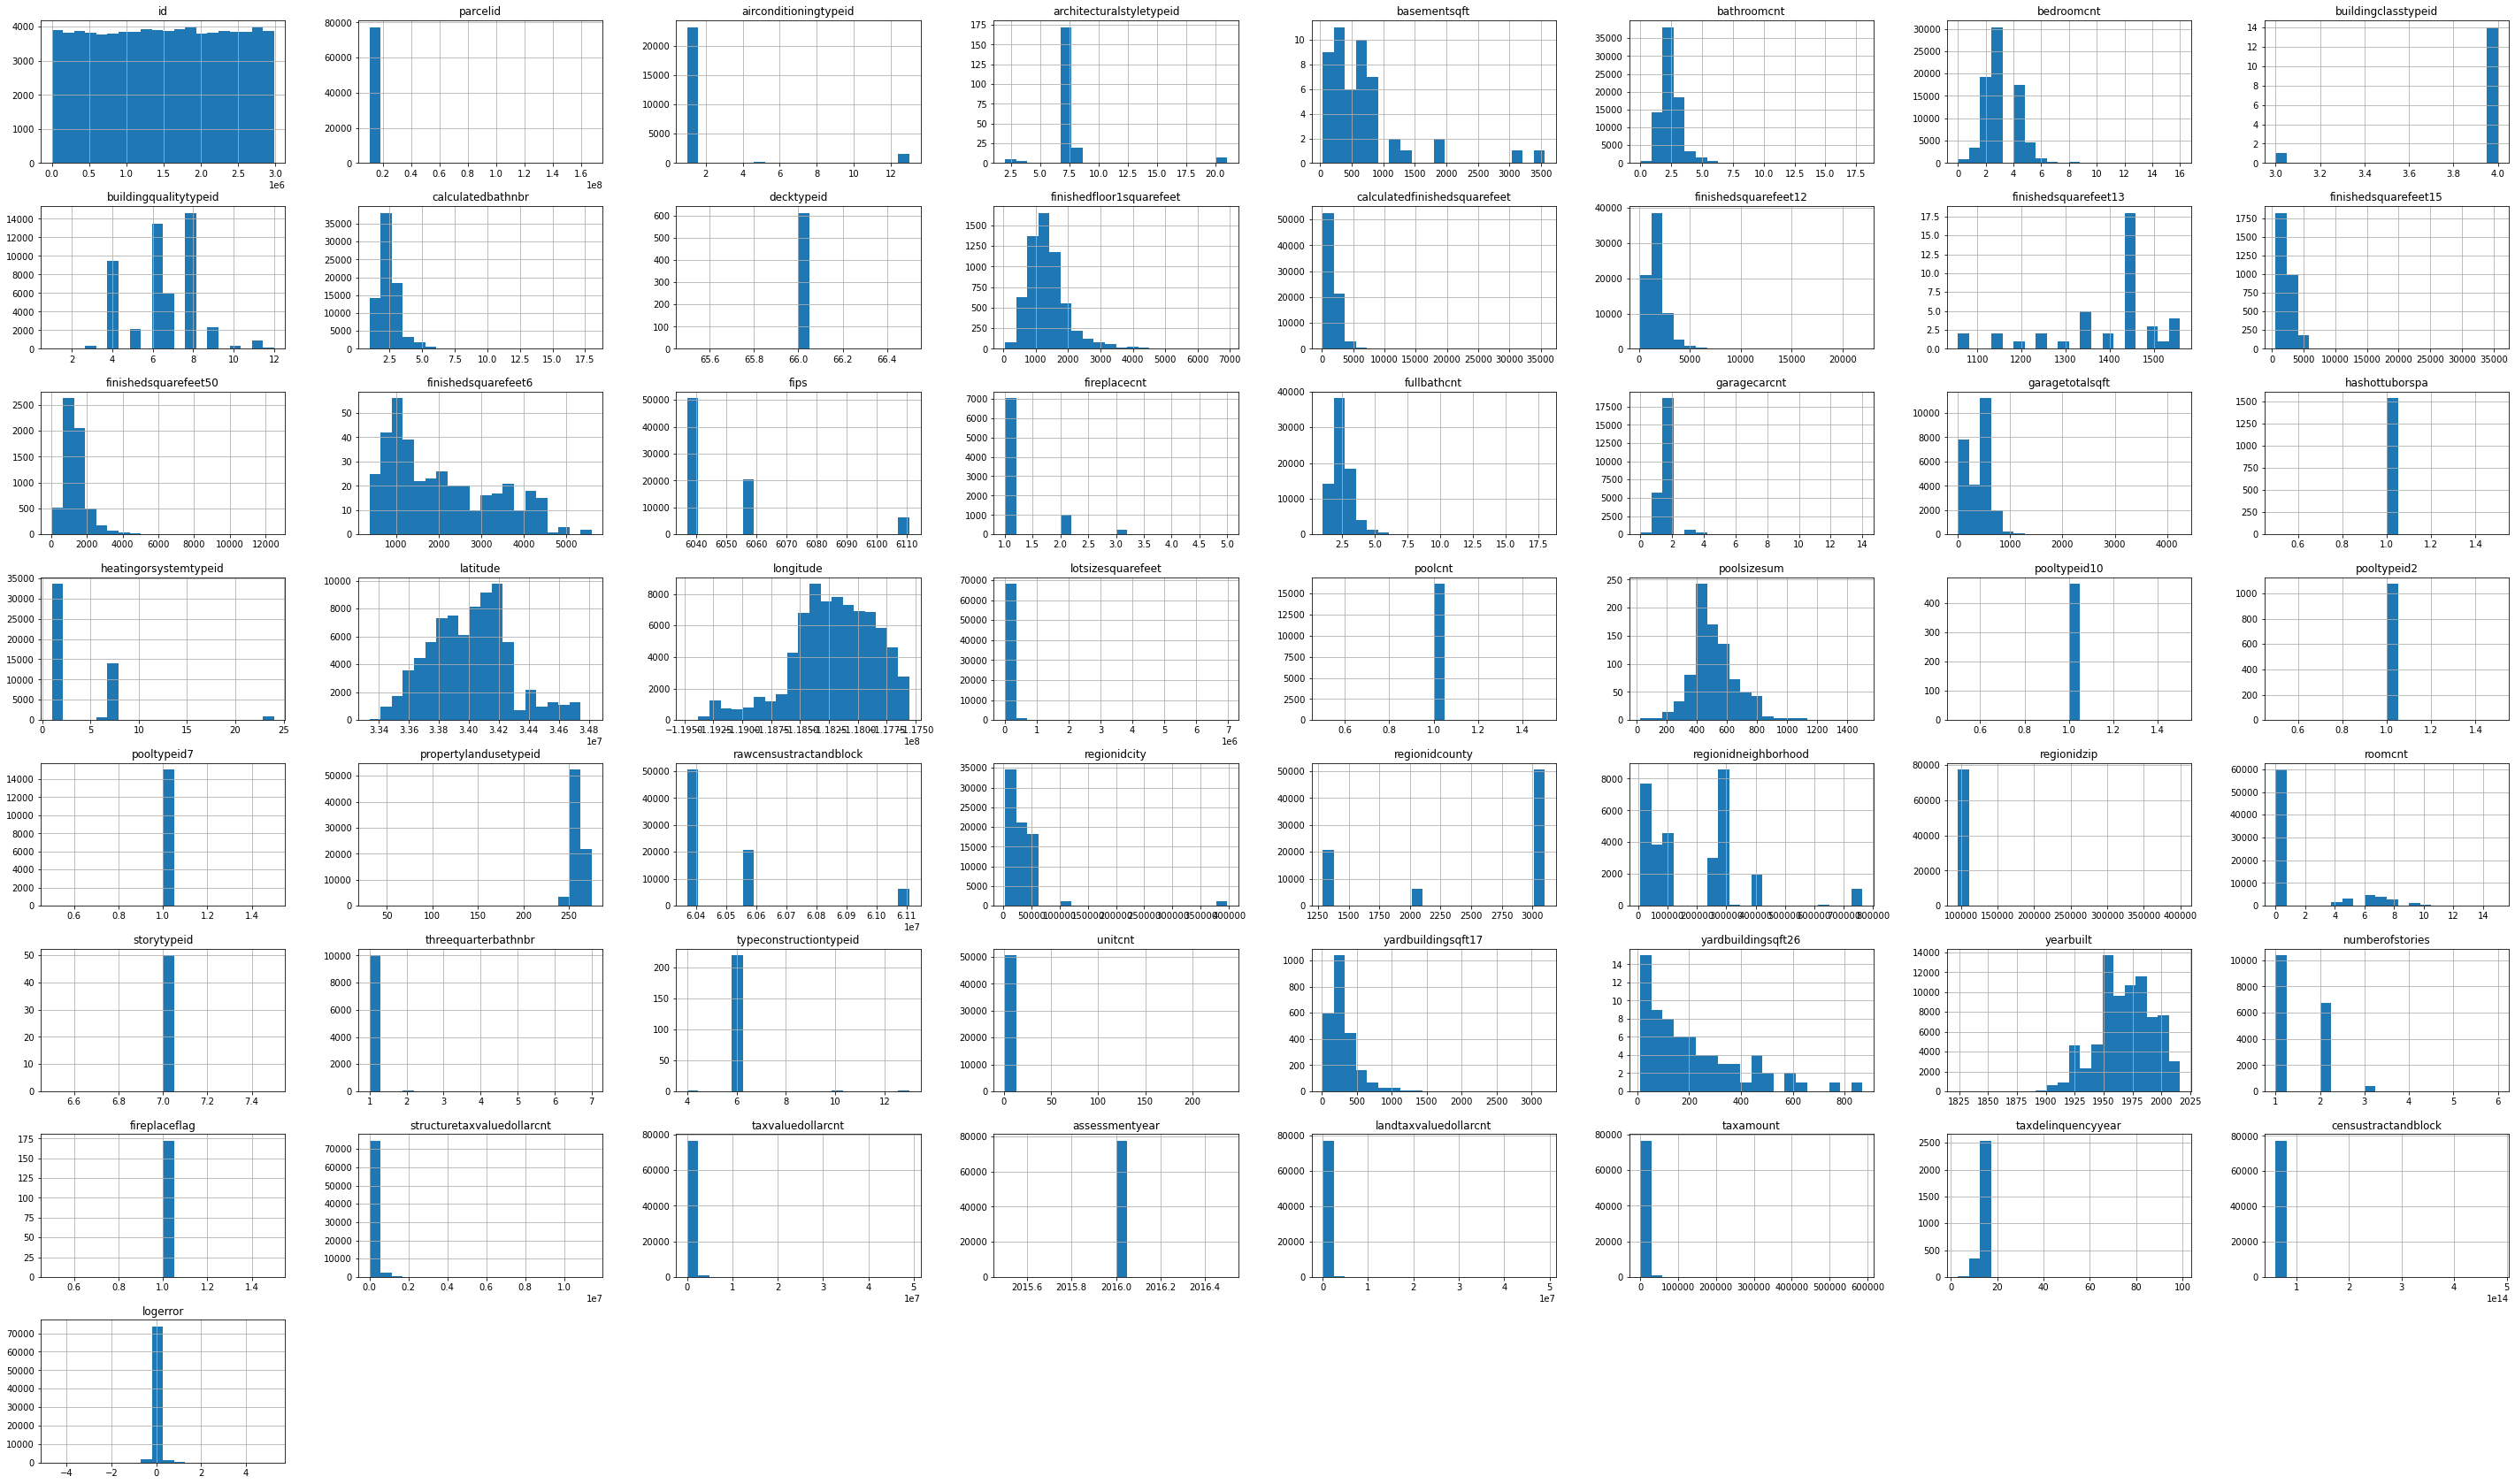

In [19]:
df.hist(figsize=(50, 30), bins=20)
plt.show()